In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [72]:
df = pd.read_csv("diabetes.csv")

In [73]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
df.shape

(768, 9)

In [75]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 768
Columns: 9


In [76]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<AxesSubplot:>

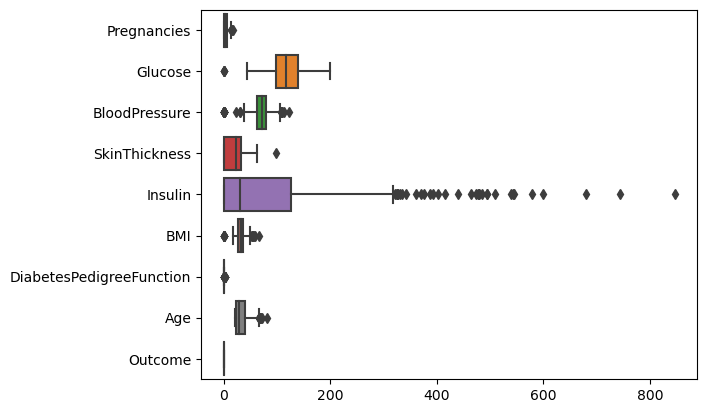

In [79]:
sns.boxplot(data=df,orient='h')

In [80]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [81]:
N1=df['Insulin'].quantile(.25)
N2=df['Insulin'].quantile(.75)
INR=N2-N1
upper=N2+1.5*INR
lower=N1-1.5*INR
INR,upper,lower

(127.25, 318.125, -190.875)

{'whiskers': [<matplotlib.lines.Line2D at 0x21aa17037f0>,
 'caps': [<matplotlib.lines.Line2D at 0x21aa1703d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21aa1703580>],
 'medians': [<matplotlib.lines.Line2D at 0x21aa15a1370>],
 'fliers': [<matplotlib.lines.Line2D at 0x21aa15a1640>],
 'means': []}

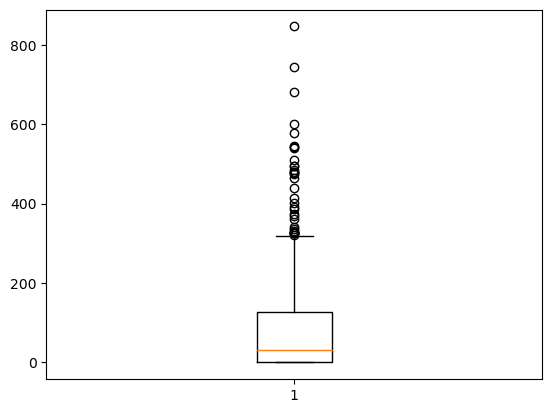

In [82]:
plt.boxplot(df['Insulin'])

In [83]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('Total Obs: ',len(x),'Train Dataset: ',len(x_train),'Testing Dataset: ',len(x_test))

Total Obs:  768 Train Dataset:  537 Testing Dataset:  231


In [85]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [86]:
sc_x_train=ss.fit_transform(x_train)
sc_x_test=ss.fit_transform(x_test)

In [87]:
sc_x_train[:4]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576],
       [ 0.08397217,  0.31417602, -0.09322566,  0.03669939,  0.74866893,
         0.14760887, -0.90681191, -0.43466673]])

In [88]:
sc_x_test[:4]

array([[ 0.52338715, -0.73944644, -0.44460031,  0.72004197,  0.95606675,
         0.23273334, -0.15228198,  0.7860505 ],
       [-0.59092098, -0.28934861,  0.32999837,  0.66112249, -0.69104306,
         0.43377686, -1.07730552, -1.05908052],
       [-0.59092098, -0.41794799, -0.17121254, -1.2243009 , -0.69104306,
        -0.14570152, -1.04450327, -1.05908052],
       [ 1.08054122, -0.45009783,  0.5578215 , -1.2243009 , -0.69104306,
        -0.87891906,  1.24509402,  0.03122418]])

In [89]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel

LogisticRegression()

In [90]:
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_pred=logmodel.predict(x_test)
y_pred[:4]

array([0, 0, 0, 0], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.7402597402597403


In [93]:
logmodel.fit(sc_x_train,y_train)

LogisticRegression()

In [94]:
sc_y_pred=logmodel.predict(sc_x_test)
sc_y_pred[:4]

array([0, 0, 0, 0], dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,sc_y_pred))

Accuracy Score:  0.7445887445887446


In [113]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=15)
clf

KNeighborsClassifier(n_neighbors=15)

In [114]:
clf=KNeighborsClassifier(n_neighbors=15)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [115]:
y_pred=clf.predict(x_test)
y_pred[:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0], dtype=int64)

In [116]:
score=clf.score(x_test,y_test)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7402597402597403

In [117]:
clf.fit(sc_x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [118]:
sc_y_pred=clf.predict(sc_x_test)
sc_y_pred[:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 1], dtype=int64)

In [119]:
score=clf.score(sc_x_test,y_test)
score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7229437229437229

In [125]:
from sklearn.svm import SVC
svcbl=SVC(kernel='linear')
svcbl

SVC(kernel='linear')

In [126]:
svcbl.fit(x_train,y_train)

SVC(kernel='linear')

In [128]:
y_pred=svcbl.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [129]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.7445887445887446


In [131]:
svcbl.fit(sc_x_train,y_train)

SVC(kernel='linear')

In [132]:
sc_y_pred=svcbl.predict(sc_x_test)
sc_y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,sc_y_pred))

Accuracy Score:  0.7532467532467533


In [135]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.63      0.62      0.63        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [136]:
print(confusion_matrix(y_test,y_pred))

[[122  29]
 [ 30  50]]


In [137]:
from sklearn.tree import DecisionTreeClassifier
clb=DecisionTreeClassifier()
clb

DecisionTreeClassifier()

In [139]:
clb.fit(x_train,y_train)

DecisionTreeClassifier()

In [141]:
y_pred=clb.predict(x_test)
y_pred[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [142]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.7142857142857143


In [143]:
clb.fit(sc_x_train,y_train)

DecisionTreeClassifier()

In [144]:
sc_y_pred=clb.predict(sc_x_test)
sc_y_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [145]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,sc_y_pred))

Accuracy Score:  0.7142857142857143


In [146]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfb = RandomForestClassifier(random_state=0)
rfb

RandomForestClassifier(random_state=0)

In [147]:
rfb.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [150]:
y_pred=clb.predict(x_test)
y_pred[:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1], dtype=int64)

In [152]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.3463203463203463


In [153]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
nbb=GaussianNB()
nbb

GaussianNB()

In [154]:
nbb.fit(x_train,y_train)

GaussianNB()

In [155]:
y_pred=nbb.predict(x_test)
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [156]:
print(accuracy_score(y_test,y_pred))

0.7445887445887446


In [157]:
#N-scaled
nbb.fit(sc_x_train,y_train)

GaussianNB()

In [158]:
sc_y_pred=nbb.predict(sc_x_test)
sc_y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [159]:
print(accuracy_score(y_test,sc_y_pred))

0.7532467532467533
